<a href="https://colab.research.google.com/github/DSAishwaryaG/Claim_Prediction/blob/main/Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [ ]:
!python --version

Python 3.6.9


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/Project_Datasets/Auto_Insurance_Claims_Sample.csv')

In [ ]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
df.head(5)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df.head(5)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [ ]:
df2=df.drop(['Customer'],axis=1)


In [ ]:
import collections
df2 = df.drop(['Customer'], axis=1)

cat_features = list(df2.select_dtypes(include=['object']).columns)
print("categorical values: {}".format(len(cat_features)))

cat_uniques = []
for cat in cat_features:
    cat_uniques.append(len(df2[cat].unique()))

uv = pd.DataFrame.from_dict(collections.OrderedDict([('cat_names', cat_features), ('unique_values', cat_uniques)]))
uv

categorical values: 17


,cat_names,unique_values
0,Country,1
1,State Code,5
2,State,5
3,Response,2
4,Coverage,3
5,Education,5
6,Effective To Date,59
7,EmploymentStatus,5
8,Gender,2
9,Location Code,3


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        9134 non-null   object 
 1   State Code                     9134 non-null   object 
 2   State                          9134 non-null   object 
 3   Claim Amount                   9134 non-null   float64
 4   Response                       9134 non-null   object 
 5   Coverage                       9134 non-null   object 
 6   Education                      9134 non-null   object 
 7   Effective To Date              9134 non-null   object 
 8   EmploymentStatus               9134 non-null   object 
 9   Gender                         9134 non-null   object 
 10  Income                         9134 non-null   int64  
 11  Location Code                  9134 non-null   object 
 12  Marital Status                 9134 non-null   o

Populating the interactive namespace from numpy and matplotlib


Text(7, 71, 'Binary features')

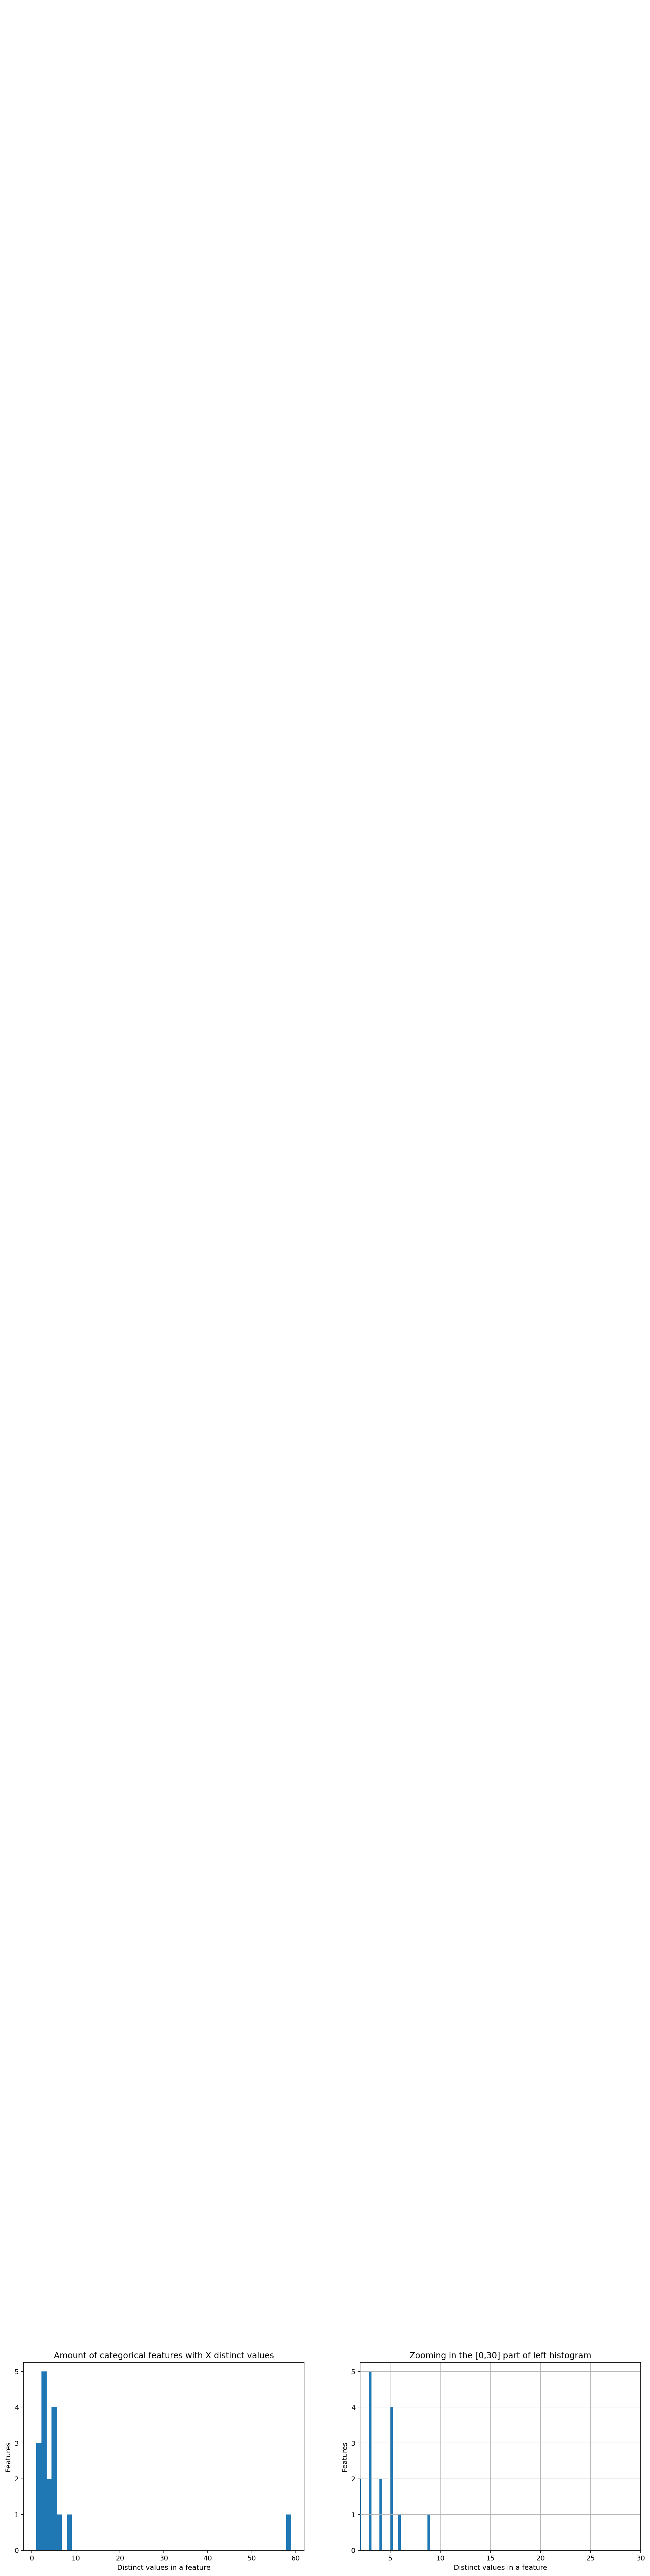

In [ ]:
%pylab inline

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(uv.unique_values, bins=50)
ax1.set_title('Amount of categorical features with X distinct values')
ax1.set_xlabel('Distinct values in a feature')
ax1.set_ylabel('Features')

ax2.set_xlim(2,30)
ax2.set_title('Zooming in the [0,30] part of left histogram')
ax2.set_xlabel('Distinct values in a feature')
ax2.set_ylabel('Features')
ax2.grid(True)
ax2.hist(uv[uv.unique_values <= 30].unique_values, bins=30)
ax2.annotate('Binary features', xy=(3, 71), xytext=(7, 71), arrowprops=dict(facecolor='black'))

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

df2["Education_code"] = lb_make.fit_transform(df2["Education"])
df2.append(df2["Education_code"])
df2["EmploymentStatus_code"] = lb_make.fit_transform(df2["EmploymentStatus"])
df2.append(df2["EmploymentStatus_code"])
df2["Gender_code"] = lb_make.fit_transform(df2["Gender"])
df2.append(df2["Gender_code"])
df2["Marital Status code"] = lb_make.fit_transform(df2["Marital Status"])
df2.append(df2["Marital Status code"])
df2["Policy Type code"] = lb_make.fit_transform(df2["Policy Type"])
df2.append(df2["Policy Type code"])
df2["Coverage code"] = lb_make.fit_transform(df2["Coverage"])
df2.append(df2["Coverage code"])
df2["Response code"] = lb_make.fit_transform(df2["Response"])
df2.append(df2["Response code"])
df2["Policy code"] = lb_make.fit_transform(df2["Policy"])
df2.append(df2["Policy code"])
df2["Location"] = lb_make.fit_transform(df2["Location Code"])
df2.append(df2["Location"])
df2["Claim Reason code"] = lb_make.fit_transform(df2["Claim Reason"])
df2.append(df2["Claim Reason code"])
df2["Sales Channel code"] = lb_make.fit_transform(df2["Sales Channel"])
df2.append(df2["Sales Channel code"])
df2["Vehicle Class code"] = lb_make.fit_transform(df2["Vehicle Class"])
df2.append(df2["Vehicle Class code"])
df2["Vehicle Size code"] = lb_make.fit_transform(df2["Vehicle Size"])
df2.append(df2["Vehicle Size code"])
df2["State code"] = lb_make.fit_transform(df2["State"])
df2.append(df2["State code"])
df2.head(5)

,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Education_code,EmploymentStatus_code,Gender_code,Marital Status code,Policy Type code,Coverage code,Response code,Policy code,Location,Claim Reason code,Sales Channel code,Vehicle Class code,Vehicle Size code,State code
0,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,0,1,0,1,0,0,0,2,1,0,0,5,1,1
1,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,0,4,0,2,1,1,0,5,1,3,0,0,1,3
2,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,0,1,0,1,1,2,0,5,1,0,0,5,1,4
3,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,0,4,1,1,0,0,0,1,1,0,2,3,1,2
4,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,0,1,1,2,1,0,0,3,0,0,0,0,1,1


In [ ]:























/

In [ ]:
df2=df2.drop(["State Code","Country","State","Location Code","Claim Reason","Sales Channel","Vehicle Class","Vehicle Size"],axis=1)

In [ ]:
def f(x):
  dfd=x.copy()
  dfd['year']=pd.DatetimeIndex(x['Effective To Date']).year
  dfd['month']=pd.DatetimeIndex(x['Effective To Date']).month
  dfd['day']=pd.DatetimeIndex(x['Effective To Date']).day
  return dfd
df2=f(df2)

In [ ]:
import datetime
years = df2['year']
months = df2['month']
days = df2['day']

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months,days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
dates.sort()
print(dates)

[datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), 

In [ ]:
df2.head(5)

,Claim Amount,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Education_code,EmploymentStatus_code,Gender_code,Marital Status code,Policy Type code,Coverage code,Response code,Policy code,Location,Claim Reason code,Sales Channel code,Vehicle Class code,Vehicle Size code,State code,year,month,day
0,276.351928,2/24/11,56274,69,32,5,0,1,384.811147,0,1,0,1,0,0,0,2,1,0,0,5,1,1,2011,2,24
1,697.953590,1/31/11,0,94,13,42,0,8,1131.464935,0,4,0,2,1,1,0,5,1,3,0,0,1,3,2011,1,31
2,1288.743165,2/19/11,48767,108,18,38,0,2,566.472247,0,1,0,1,1,2,0,5,1,0,0,5,1,4,2011,2,19
3,764.586183,1/20/11,0,106,18,65,0,7,529.881344,0,4,1,1,0,0,0,1,1,0,2,3,1,2,2011,1,20
4,281.369258,2/3/11,43836,73,12,44,0,1,138.130879,0,1,1,2,1,0,0,3,0,0,0,0,1,1,2011,2,3


Continuous: 8 features


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58a3860a90>,
      dtype=object)

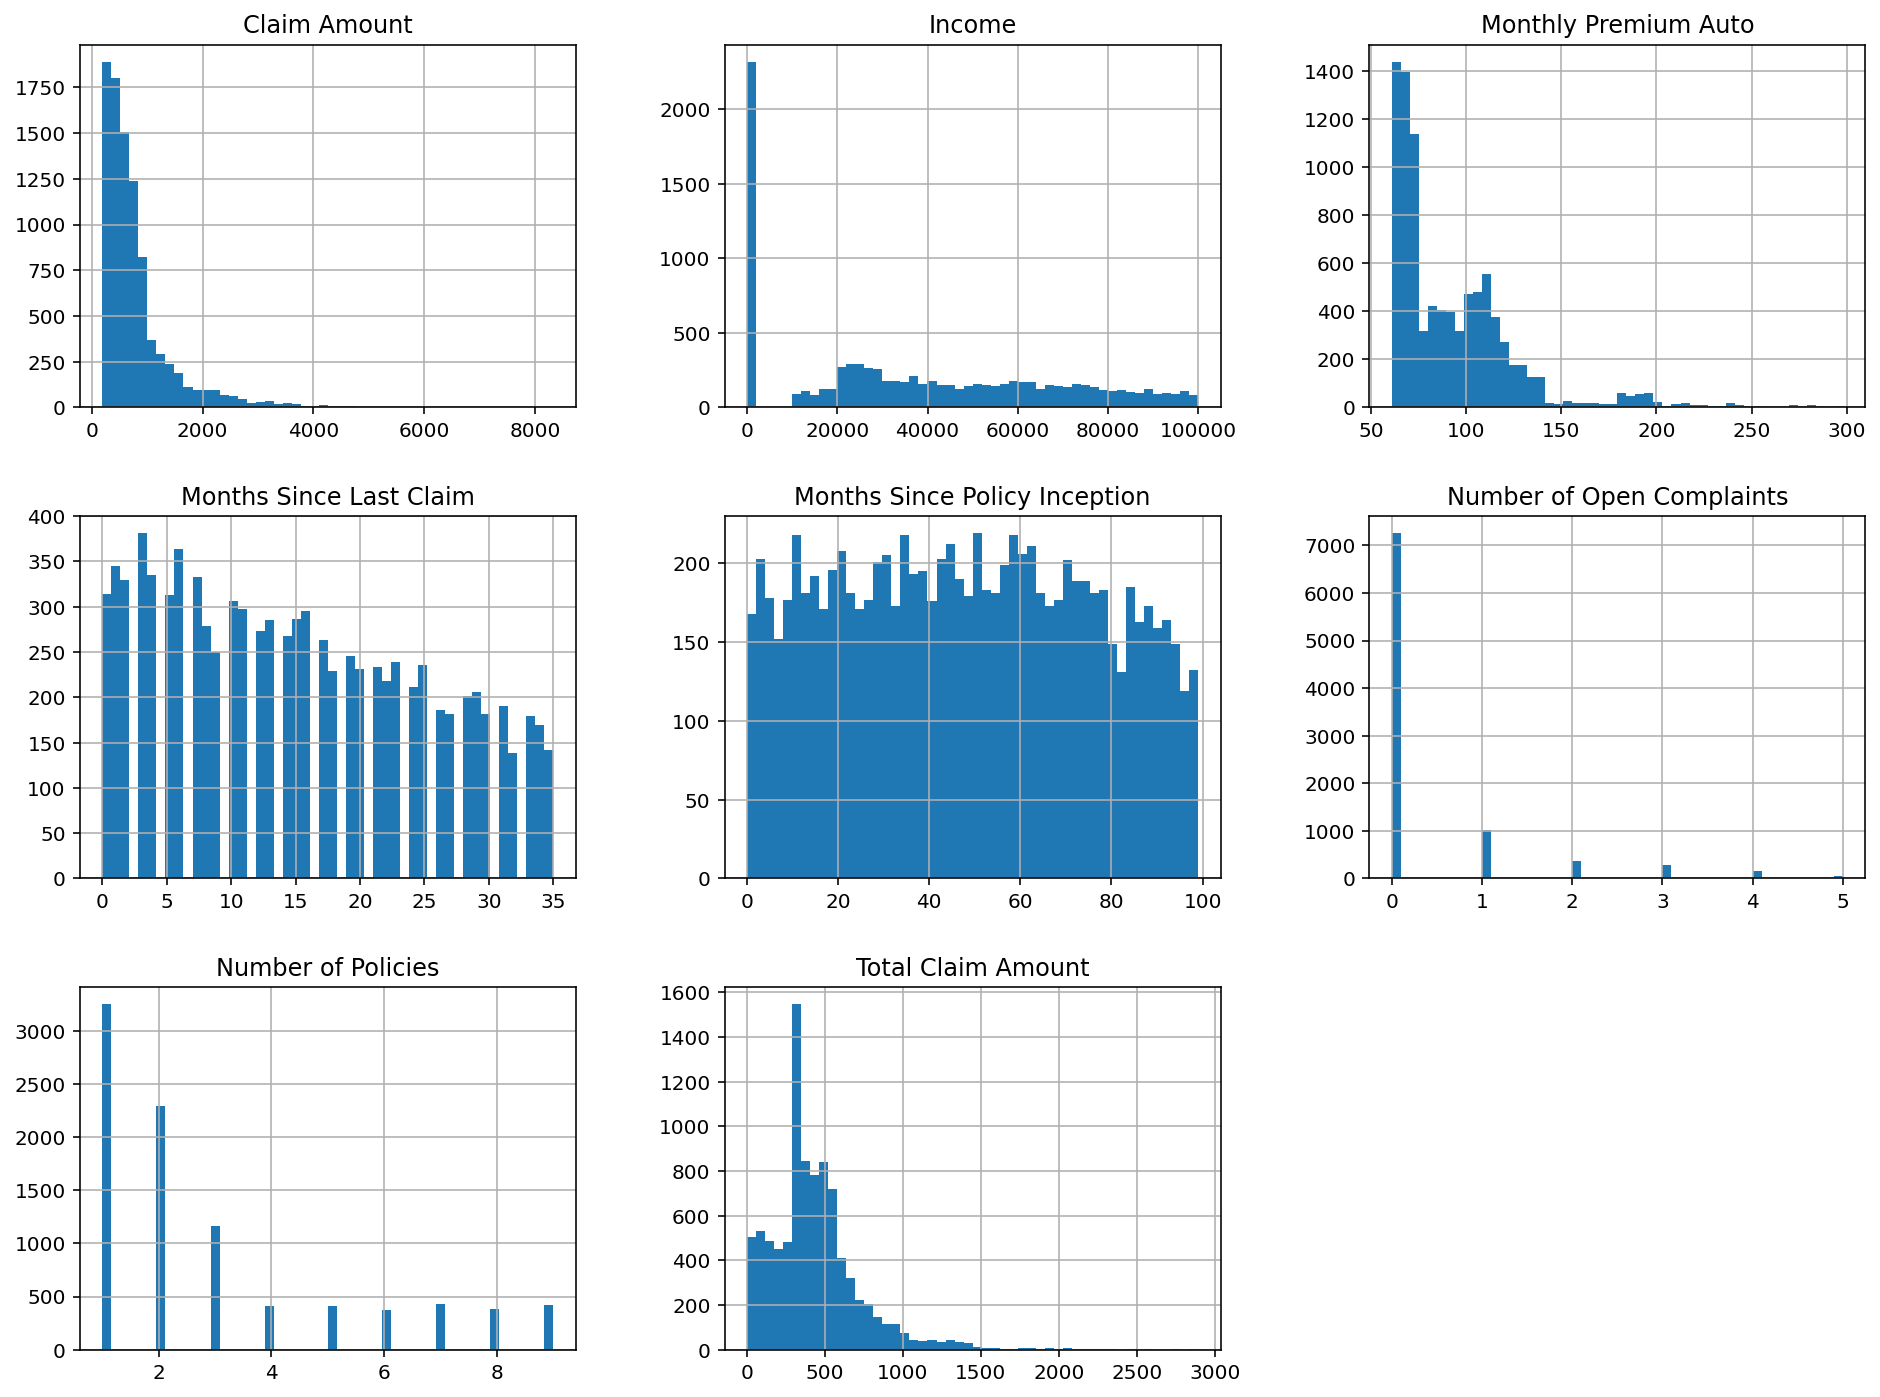

In [ ]:
cont_features = [cont for cont in list(df.select_dtypes(
                 include=['float64', 'int64']).columns)]
print("Continuous: {} features".format(len(cont_features)))
df[cont_features].hist(bins=50, figsize=(16,12))


In [ ]:
from scipy import stats
stats.mstats.skew(np.log(df2['Claim Amount'])).data

array(0.57584613)

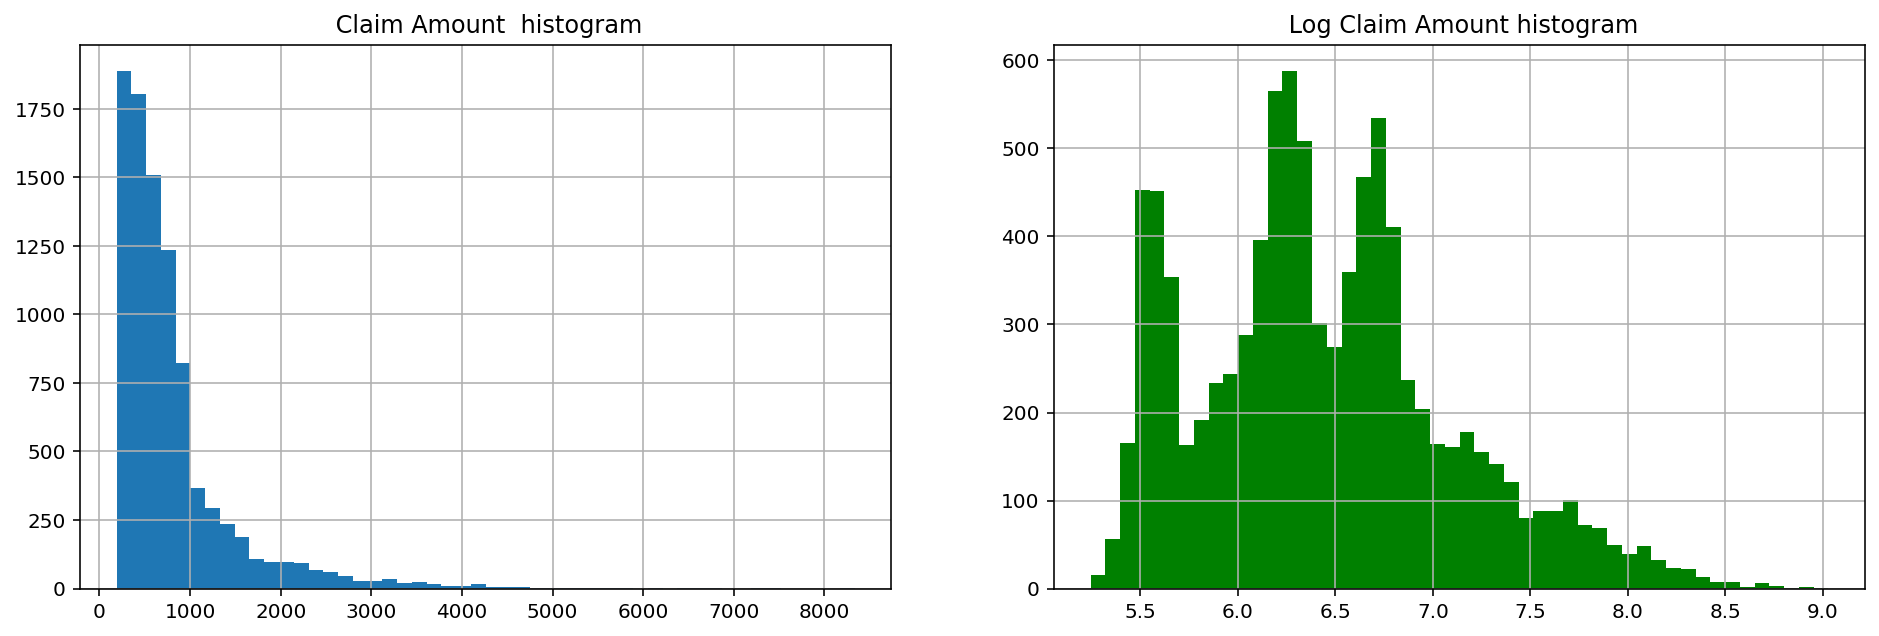

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(df2['Claim Amount'], bins=50)
ax1.set_title(' Claim Amount  histogram')
ax1.grid(True)
ax2.hist(np.log(df2['Claim Amount']), bins=50, color='g')
ax2.set_title(' Log Claim Amount histogram')
ax2.grid(True)
plt.show()

In [ ]:
from scipy import stats
stats.mstats.skew(np.log(df2['Total Claim Amount'])).data

array(-1.91971756)

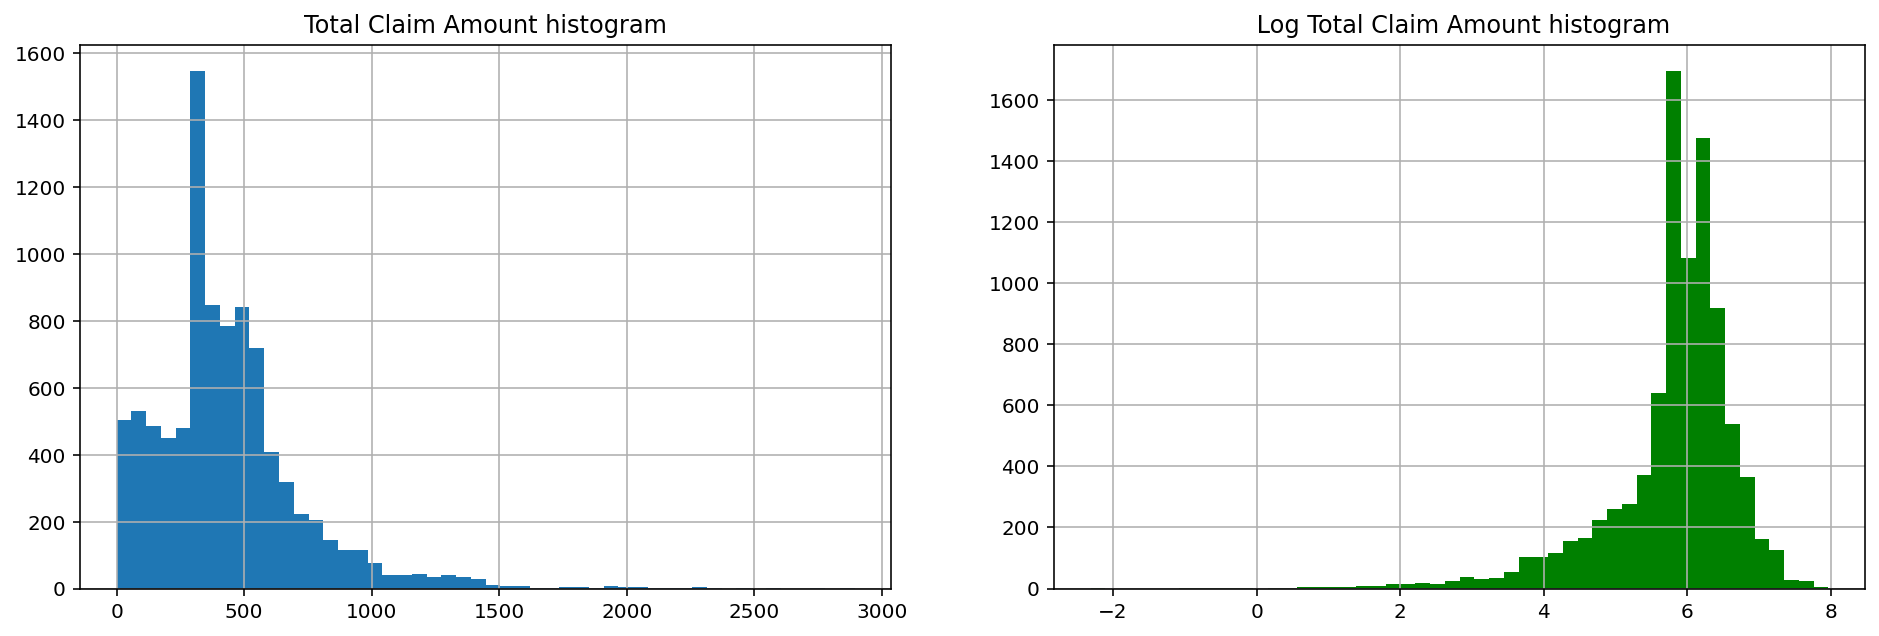

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(df2['Total Claim Amount'], bins=50)
ax1.set_title('Total Claim Amount histogram')
ax1.grid(True)
ax2.hist(np.log(df2['Total Claim Amount']), bins=50, color='g')
ax2.set_title(' Log Total Claim Amount histogram')
ax2.grid(True)
plt.show()

In [ ]:
from scipy import stats
stats.mstats.skew(np.log(df2['Monthly Premium Auto'])).data

array(1.00598889)

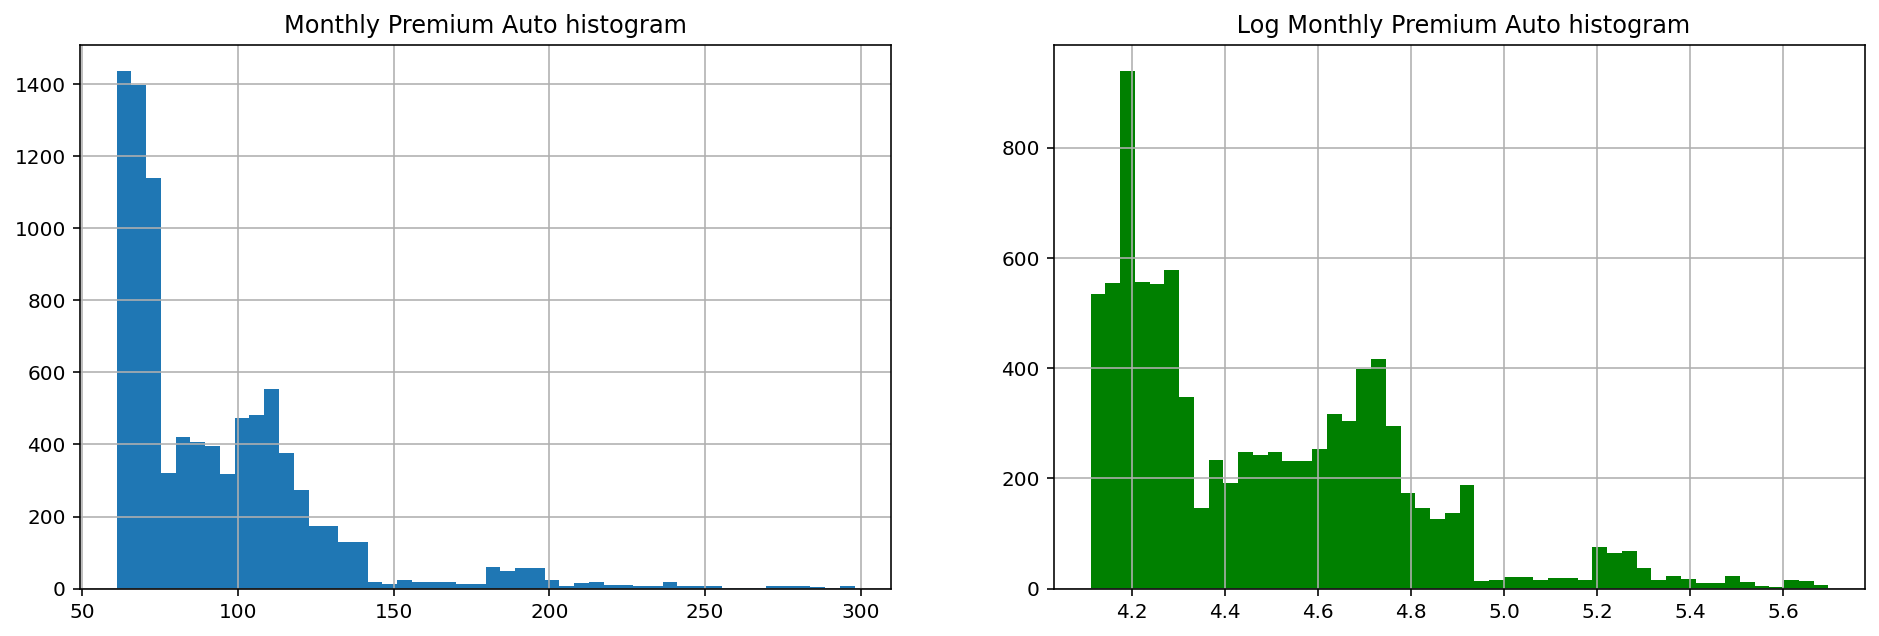

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(df2['Monthly Premium Auto'], bins=50)
ax1.set_title('Monthly Premium Auto histogram')
ax1.grid(True)
ax2.hist(np.log(df2['Monthly Premium Auto']), bins=50, color='g')
ax2.set_title(' Log Monthly Premium Auto histogram')
ax2.grid(True)
plt.show()

In [ ]:
df2[["Claim Amount", "Total Claim Amount"]] = df2[["Claim Amount", "Total Claim Amount"]].astype(int)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Claim Amount                   9134 non-null   int64 
 1   Effective To Date              9134 non-null   object
 2   Income                         9134 non-null   int64 
 3   Monthly Premium Auto           9134 non-null   int64 
 4   Months Since Last Claim        9134 non-null   int64 
 5   Months Since Policy Inception  9134 non-null   int64 
 6   Number of Open Complaints      9134 non-null   int64 
 7   Number of Policies             9134 non-null   int64 
 8   Total Claim Amount             9134 non-null   int64 
 9   Education_code                 9134 non-null   int64 
 10  EmploymentStatus_code          9134 non-null   int64 
 11  Gender_code                    9134 non-null   int64 
 12  Marital Status code            9134 non-null   int64 
 13  Pol

In [ ]:
df2=df2.drop(["Effective To Date"],axis=1)

In [ ]:
label=np.array(df2['Total Claim Amount'])
features=df2.drop(['Total Claim Amount'],axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Claim Amount                   9134 non-null   int64
 1   Income                         9134 non-null   int64
 2   Monthly Premium Auto           9134 non-null   int64
 3   Months Since Last Claim        9134 non-null   int64
 4   Months Since Policy Inception  9134 non-null   int64
 5   Number of Open Complaints      9134 non-null   int64
 6   Number of Policies             9134 non-null   int64
 7   Education_code                 9134 non-null   int64
 8   EmploymentStatus_code          9134 non-null   int64
 9   Gender_code                    9134 non-null   int64
 10  Marital Status code            9134 non-null   int64
 11  Policy Type code               9134 non-null   int64
 12  Coverage code                  9134 non-null   int64
 13  Response code     

In [ ]:
#                                              Regression and Random forest before PCA
import sklearn.model_selection as model_selection
train_features,test_features,train_labels,test_labels=model_selection.train_test_split(features,label,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
lr=linear_model.LinearRegression()

In [ ]:
model1=lr.fit(train_features,train_labels)
prediction=lr.predict(test_features)
print('Prediction : ',prediction)
errors=abs(prediction-test_labels)
print('Error : ',errors)
print('Mean Absolute Error : ',round(np.mean(errors),2))
mape=100*(errors/test_labels)
print('MAPE : ',mape)
#accuracy=100-np.mean(mape)
#print('Accuracy : ',round(accuracy,2))
accuracy=model1.score(test_features, test_labels)
 
print('Accuracy: ' ,accuracy*100,'%')

print('score : ', model1.score(test_features,test_labels))

Prediction :  [296.89892756 351.04873415 303.29171947 ... 507.62855844 318.03463385
 777.57207639]
Error :  [ 78.89892756  95.95126585 147.70828053 ... 144.37144156 168.03463385
 325.57207639]
Mean Absolute Error :  130.49
MAPE :  [ 36.1921686   21.46560757  32.75128171 ...  22.14285914 112.02308923
  72.02922044]
Accuracy:  61.1011517437538 %
score :  0.611011517437538


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


<function matplotlib.pyplot.show>

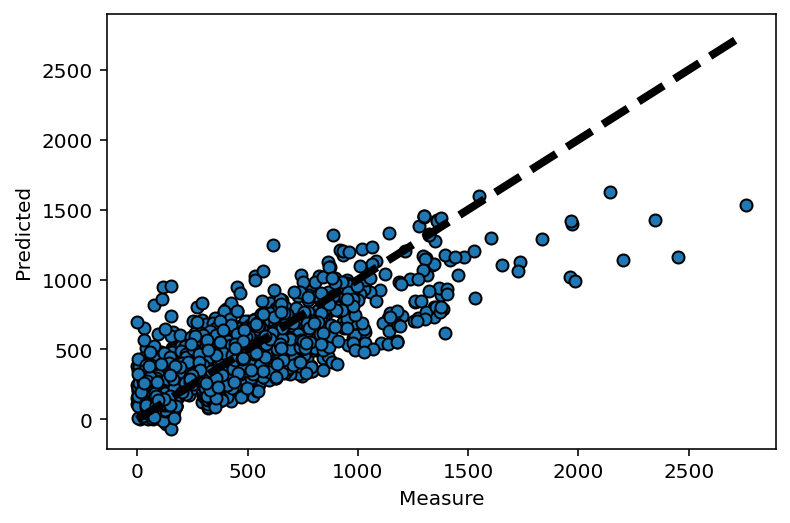

In [ ]:
fig,ax=plt.subplots()
ax.scatter(test_labels,prediction,edgecolors=(0,0,0))
ax.plot([test_labels.min(),test_labels.max()],[test_labels.min(),test_labels.max()],'k--',lw=4)
ax.set_xlabel('Measure')
ax.set_ylabel('Predicted')
plt.show

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model2=rf.fit(train_features,train_labels)
prediction2=rf.predict(test_features)
print('Prediction : ',prediction2[1:100])
errors2=abs(prediction2-test_labels)
print('Error : ',errors2)
print('Mean Absolute Error',round(np.mean(errors2),2))
mape2=100*(errors2/test_labels)
print('MAPE : ',mape2)
accuracy2=100-np.mean(mape2)
print('Accuracy : ',round(accuracy2,2))
print('score : ', model2.score(test_features,test_labels))

Prediction :  [ 389.36  467.3   342.59  376.69  406.75   74.16  432.86  342.96   77.03
    9.16  118.99  252.64  339.47  315.86  383.14  753.85 1263.74  524.72
   82.23  349.52  550.89  324.04  431.11   79.49  316.35  872.82  367.25
  524.63  354.21  409.05  581.75  379.88  376.29  825.91  348.03  433.49
  392.67  418.71  403.92  646.82  344.18  537.23  342.41  355.86  232.67
  348.03   85.01  640.1    89.94  469.35  604.4   144.47  248.64  313.19
  490.79  445.22 1322.34  144.04  659.84  443.93  793.84  364.57  437.26
  407.47  621.66   76.24  208.22 1706.48  307.55  369.47  115.46  314.22
  448.08  828.78  271.54  394.7    82.51  277.8   233.54  334.33  678.55
  592.96  396.37  768.49  415.97   87.4    98.85  106.44  429.62  574.1
  386.76   60.38  694.17   65.11  726.53  518.74  400.68  245.63  724.72]
Error :  [96.   57.64 16.3  ... 50.95 68.59 12.81]
Mean Absolute Error 74.57
MAPE :  [44.03669725 12.89485459  3.61419069 ...  7.81441718 45.72666667
  2.8340708 ]
Accuracy :  -inf
sc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


<function matplotlib.pyplot.show>

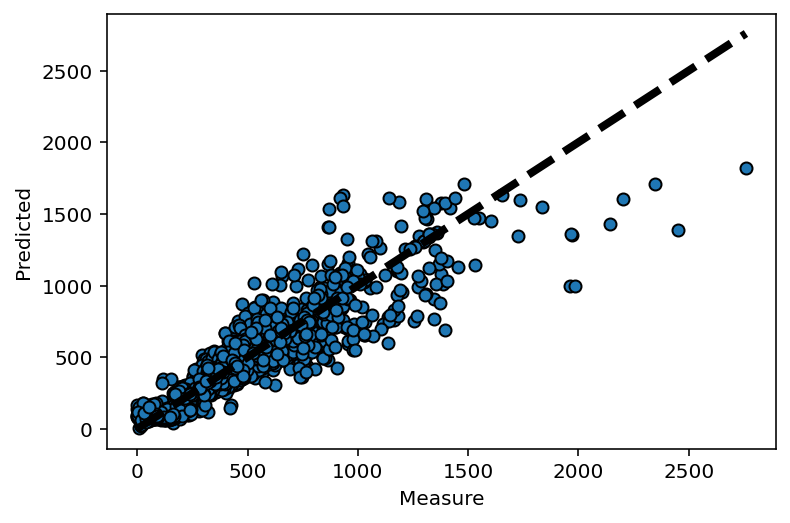

In [ ]:
fig,ax=plt.subplots()
ax.scatter(test_labels,prediction2,edgecolors=(0,0,0))
ax.plot([test_labels.min(),test_labels.max()],[test_labels.min(),test_labels.max()],'k--',lw=4)
ax.set_xlabel('Measure')
ax.set_ylabel('Predicted')
plt.show

[ 8.39 16.58 24.16 29.68 34.59 39.18 43.74 48.27 52.68 57.06 61.4  65.72
 69.96 74.17 78.32 82.26 86.12 89.64 93.1  96.36 98.3  99.46 99.98 99.98]
[[ 0.61722779 -2.11592681 -0.62730622 ... -0.49035426  0.25133635
   0.92864482]
 [-2.23202687  0.73119516 -0.28296722 ... -0.21613046 -1.48938646
  -1.64018867]
 [ 0.39731236  0.86353013  2.22730841 ... -0.91793379 -0.29581236
   0.78174062]
 ...
 [-2.54440911 -2.37890557 -0.02668206 ...  0.07482766  0.83912587
   0.09472475]
 [ 0.37957413  0.27721572 -0.06294678 ...  0.27094949 -0.77725079
  -0.49385304]
 [-2.19882161 -2.03976684 -0.16561441 ... -1.27104215 -0.39001832
  -0.24282961]]


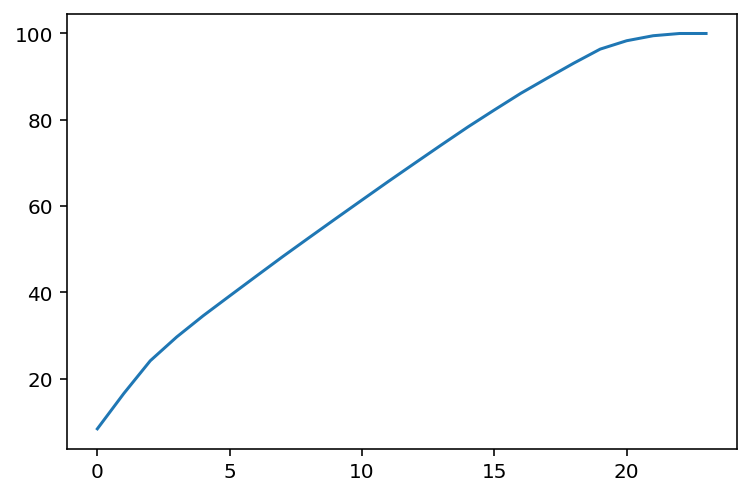

In [ ]:
#PCA 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline
X=features.values
X = scale(X)
pca = PCA(n_components=24)
pca.fit(X)
var=pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
pca = PCA(n_components=20)
pca.fit(X)
X1=pca.fit_transform(X)
print(X1)




In [ ]:
#                                              Regression and Random forest after PCA
train_features,test_features,train_labels,test_labels=model_selection.train_test_split(X1,label,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
#from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
lr=linear_model.LinearRegression()

In [ ]:
model3=lr.fit(train_features,train_labels)
prediction=lr.predict(test_features)
print('Prediction : ',prediction)
errors=abs(prediction-test_labels)
print('Error : ',errors)
print('Mean Absolute Error : ',round(np.mean(errors),2))
mape=100*(errors/test_labels)
print('MAPE : ',mape)
accuracy=100-np.mean(mape)
print('Accuracy : ',round(accuracy,2))
print('score : ', model3.score(test_features,test_labels))

Prediction :  [190.34365127 367.09364494 380.418405   ... 426.137714   355.00628281
 899.12586929]
Error :  [ 27.65634873  79.90635506  70.581595   ... 225.862286   205.00628281
 447.12586929]
Mean Absolute Error :  147.66
MAPE :  [ 12.6863985   17.87614207  15.65002106 ...  34.64145491 136.67085521
  98.9216525 ]
Accuracy :  -inf
score :  0.5100176767023766


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


<function matplotlib.pyplot.show>

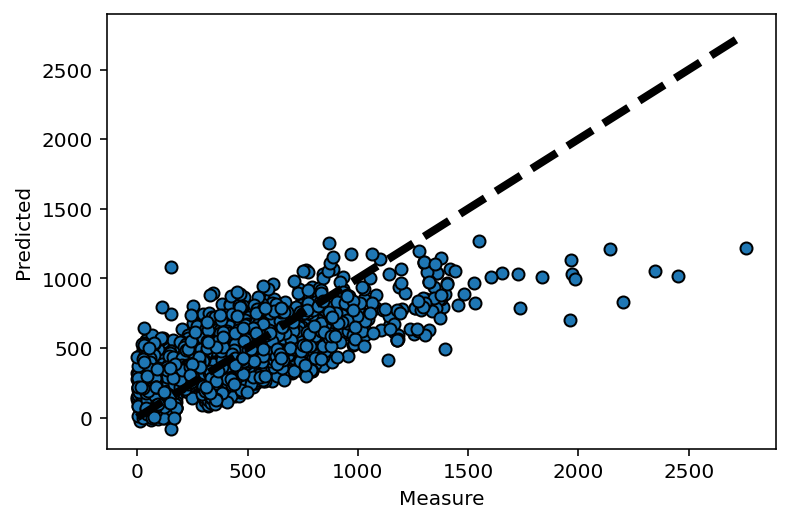

In [ ]:
fig,ax=plt.subplots()
ax.scatter(test_labels,prediction,edgecolors=(0,0,0))
ax.plot([test_labels.min(),test_labels.max()],[test_labels.min(),test_labels.max()],'k--',lw=4)
ax.set_xlabel('Measure')
ax.set_ylabel('Predicted')
plt.show

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model4=rf.fit(train_features,train_labels)
prediction2=rf.predict(test_features)
print('Prediction : ',prediction2[1:100])
errors2=abs(prediction2-test_labels)
print('Error : ',errors2)
print('Mean Absolute Error',round(np.mean(errors2),2))
mape2=100*(errors2/test_labels)
print('MAPE : ',mape2)
accuracy2=100-np.mean(mape2)
print('Accuracy : ',round(accuracy2,2))
print('score : ', model4.score(test_features,test_labels))

Prediction :  [ 335.78  509.63  343.41  327.44  355.06  233.4   352.64  297.65  267.17
   79.83  265.51  253.26  353.71  371.08  405.06  652.4  1585.17  504.22
  111.1   352.98  401.27  275.57  439.21  148.53  377.49  808.78  479.28
  473.33  314.97  333.32  604.98  369.12  297.4   860.32  341.46  438.4
  418.    295.21  333.48  687.3   357.79  433.03  304.73  326.15  277.5
  341.35  374.56  516.74  194.4   550.71  604.32  611.06  261.26  368.95
  487.3   444.74  914.88  221.06  531.09  416.99  881.74  346.49  369.68
  536.37  461.3   250.64  209.89 1411.13  308.46  521.56  267.65  335.59
  574.83  873.62  283.9   375.96  150.79  351.47  329.54  492.02  552.07
  506.9   485.12  868.67  332.18  129.37   82.75   88.27  437.19  383.74
  286.37  277.93  453.39   87.47  648.21  490.38  248.11  263.6   567.49]
Error :  [ 57.82 111.22  58.63 ... 183.99 198.44 326.21]
Mean Absolute Error 110.78
MAPE :  [ 26.52293578  24.88143177  13.         ...  28.21932515 132.29333333
  72.17035398]
Accurac

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


<function matplotlib.pyplot.show>

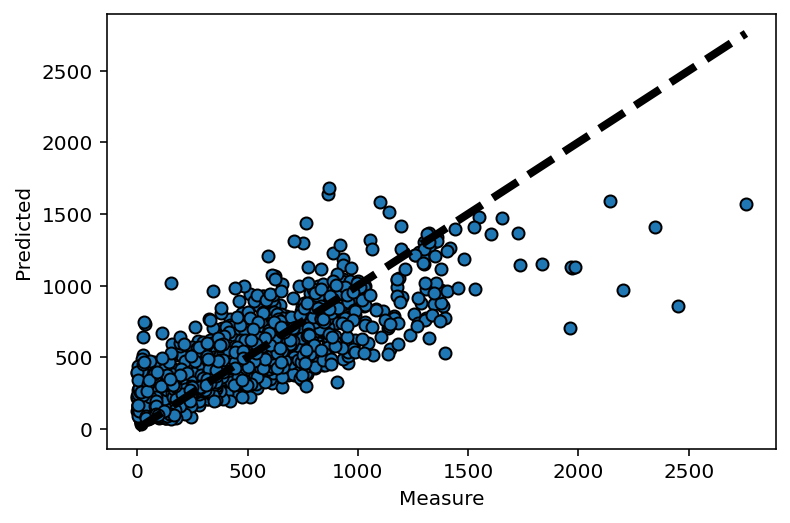

In [ ]:
fig,ax=plt.subplots()
ax.scatter(test_labels,prediction2,edgecolors=(0,0,0))
ax.plot([test_labels.min(),test_labels.max()],[test_labels.min(),test_labels.max()],'k--',lw=4)
ax.set_xlabel('Measure')
ax.set_ylabel('Predicted')
plt.show